# Questions and answers  for the " Identify Fraud from Enron Email" Project
### By: Areej  Alashjaee


# Q1
1. Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those? [relevant rubric items: “data exploration”, “outlier investigation”]

The main goal of this project is to use machine learning method to determine (POI) person of interest in the enron case. In this project we choose an appropriate machine learning algorithm to predict whether that person is considered a person of interest (POI) or not. 


In [4]:
import pickle
import sys
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import numpy as np
from pprint import pprint
import random
import os
import re
import operator
import scipy.stats
from time import time
import pprint 

sys.path.append("../tools/")
os.chdir('/Users/lama/Desktop/P5V2/final_project')

import tester
# loads up the dataset (pickled dict of dicts)
data_dict = pickle.load(open("final_project_dataset.pkl", "r"))
df = pd.DataFrame.from_dict(data_dict, orient='index', dtype=np.float)


Populating the interactive namespace from numpy and matplotlib


/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
#print POI and total number
print('\nNumber of persons: ' + str(len(data_dict)))
print "Number of feature for each person:",len(data_dict.itervalues().next())

x=0
for i in data_dict:
        if data_dict[i]["poi"]==1:
            x+=1
            
print "number of POI's in the dataset:",x

print "Number of non-POIs : %i" %(146-x)
print "Percentage of POIs from the total : %i" %(x*100/146)


Number of persons: 146
Number of feature for each person: 21
number of POI's in the dataset: 18
Number of non-POIs : 128
Percentage of POIs from the total : 12


POIs = peopelse who were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity. Of the 
146 people in the dataset, 18 were labeled as POI, persons of interest.

Because the complexity of the data set it is a good way to use machine learning to identify the POIs. Also, it is useful to try to find and detect patterns of POIs.In other way, this project shows that we can create a model may help to determine POIs from ned data.


Based on salary and number of missing values per row, I found two outliers that should be discarded. The rest are left untouched, since a very high salary might indicate a POI, and the fact that a lot of information is missing might be an indication of the opposite (regular employers may not have bonuses, stock options and other extras).


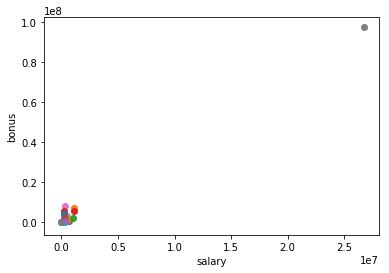

In [6]:
#salary vs. bonus
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
%matplotlib inline
### read in data dictionary, convert to numpy array
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

Summary of data exploration

- Total number of data points: 146
- Total number of data points labeled as POI: 18
- Total number of data points labeled as non-POI: 126
- Imbalanced classes
- Number of missing POIs: 17
- Number of initial features: 21
List of features with the number of "NaN" value greater than 73 

In [7]:
# create a dictionary of person and count of NaN pairs
missing_value = {}

for person in data_dict:
    missing_value[person] = 0
    for feature in data_dict[person]:
        if data_dict[person][feature] == "NaN":
            missing_value[person] +=1

# sort the dictionary by ascending ordering of values 
missing_value = sorted(missing_value.items(), key=operator.itemgetter(1))

# print top 5 those who have the most NaN
pprint.pprint(missing_value[-5:])

[('WHALEY DAVID A', 18),
 ('WROBEL BRUCE', 18),
 ('THE TRAVEL AGENCY IN THE PARK', 18),
 ('GRAMM WENDY L', 18),
 ('LOCKHART EUGENE E', 20)]


bonus deferral_payments deferred_income director_fees email_address  \
count    146               146             146           146           146   
unique    42                40              45            18           112   
top      NaN               NaN             NaN           NaN           NaN   
freq      64               107              97           129            35   

       exercised_stock_options expenses from_messages from_poi_to_this_person  \
count                      146      146           146                     146   
unique                     102       95            65                      58   
top                        NaN      NaN           NaN                     NaN   
freq                        44       51            60                      60   

       from_this_person_to_poi        ...        long_term_incentive other  \
count                      146        ...                        146   146   
unique                      42        ...                         53    93   
top                        NaN        ...                        NaN   NaN   
freq                        60        ...                         80    53   

          poi restricted_stock restricted_stock_deferred salary  \
count     146              146                       146    146   
unique      2               98                        19     95   
top     False              NaN                       NaN    NaN   
freq      128               36                       128     51   

       shared_receipt_with_poi to_messages total_payments total_stock_value  
count                      146         146            146               146  
unique                      84          87            126               125  
top                        NaN         NaN            NaN               NaN  
freq                        60          60             21                20  

[4 rows x 21 columns]

### Are there any outliers in the dataset?

Yes there are outliers :


{'bonus': ['LAVORATO JOHN J', 'TOTAL'],
 'deferral_payments': ['FREVERT MARK A', 'TOTAL'],
 'deferred_income': [],
 'director_fees': ['BHATNAGAR SANJAY', 'TOTAL'],
 'exercised_stock_options': ['LAY KENNETH L', 'TOTAL'],
 'expenses': ['MCCLELLAN GEORGE', 'TOTAL'],
 'from_messages': ['KAMINSKI WINCENTY J', 'KEAN STEVEN J'],
 'from_poi_to_this_person': ['DIETRICH JANET R', 'LAVORATO JOHN J'],
 'from_this_person_to_poi': ['DELAINEY DAVID W', 'LAVORATO JOHN J'],
 'loan_advances': ['LAY KENNETH L', 'TOTAL'],
 'long_term_incentive': ['MARTIN AMANDA K', 'TOTAL'],
 'other': ['LAY KENNETH L', 'TOTAL'],
 'restricted_stock': ['LAY KENNETH L', 'TOTAL'],
 'restricted_stock_deferred': ['BELFER ROBERT', 'BHATNAGAR SANJAY'],
 'salary': ['SKILLING JEFFREY K', 'TOTAL'],
 'shared_receipt_with_poi': ['BELDEN TIMOTHY N', 'SHAPIRO RICHARD S'],
 'to_messages': ['KEAN STEVEN J', 'SHAPIRO RICHARD S'],
 'total_payments': ['LAY KENNETH L', 'TOTAL'],
 'total_stock_value': ['LAY KENNETH L', 'TOTAL']}

##### Summary of Outlier Investigation

- Top 5 people who has the most "NaN":
- person name	number of NaN
- LOCKHART EUGENE E	20
- GRAMM WENDY L	18
- THE TRAVEL AGENCY IN THE PARK	18
- WROBEL BRUCE	18
- WHALEY DAVID A	18

##### Top 3 people repeatedly shown as outliers:
- person name	frequency of being outlier
- TOTAL	12
- LAY KENNETH L	6
- LAVORATO JOHN J	3

##### How to handle outliers?

'TOTAL' seemed an outlier introduced by spreadsheet quirk. It was the sum of all entries from the pdf financial data. It needs to be removed from the dataset.

'LOCKHART EUGENE E'  need to be removed as well because he does not have any value other than NaN and is labeled as non-POI.

Among the outliers and data points with too many missing values, only 'LAY KENNETH L' was labeled as POI and he was chairman of the Enron board of directors. So, I think these extreme values for this individual have a meaningful reason, not introduced by typos or technical errors.


I tend to keep the other outliers detected

List of data points to remove:

'TOTAL'
'LOCKHART EUGENE E'

# Q2
2. What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that doesn’t come ready-­made in the dataset-­-­explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) If you used an algorithm like a decision tree, please also give the feature importances of the features that you use.

Among 6 of email features, I think email_address can be removed to make all numerical features plus I don't think email_address will give any meaningful information in classifying the labels.



I applied different algorithms such as Random Forest, DecisionTree, SVC,# Adaboost, Logistic Regression and Nearest K with my whole set of features .The scores are shown below :

I created 12 new features of the relative values of payment and stock by using relativization method 1. and 3 new features of the fraction of emails exchanged with POI.

1- I seperate the POI label from feature_list and remove email_address

2- create new features of relative values of each payment feature to total_payments

3- create new features of relative values of each stock feature to total_stock_value


### Summary of Feature Exploration
List Name	:

- features_list	: ['salary','to_messages','deferral_payments','total_payments','exercised_stock_options','bonus', 'restricted_stock','shared_receipt_with_poi','restricted_stock_deferred','total_stock_value', 'expenses','loan_advances','from_messages','other','from_this_person_to_poi','director_fees', 'deferred_income','long_term_incentive','from_poi_to_this_person']
number of Features: 19 

- rel_payment	['rel_salary','rel_bonus','rel_long_term_incentive','rel_deferral_payments','rel_loan_advances', 'rel_other','rel_expenses','rel_director_fees','rel_deferred_income'] number of Features:	9

- payment_features	['salary','bonus','long_term_incentive','deferral_payments','loan_advances','other','expenses', 'director_fees','deferred_income','total_payments']	number of Features:10

- rel_stock	['rel_exercised_stock_options','rel_restricted_stock','rel_restricted_stock_deferred']	number of Features:3

- stock_features	['exercised_stock_options','restricted_stock','restricted_stock_deferred','total_stock_value']	number of Features:4

- financial_features	payment_features+stock_features number of Features:	14

- rel_financial_features	rel_payment+rel_stock	number of Features:12

- email_features	['to_messages', 'from_poi_to_this_person', 'from_messages','from_this_person_to_poi', 'shared_receipt_with_poi','fraction_poi', 'fraction_to_poi', 'fraction_from_poi']	number of Features:8

- total_features	financial_features + email_features		number of Features: 22

- rel_total_features	rel_financial_features + email_features number of Features:	20


#### do I have to do any scaling? why or why not?

Yes. I will use MinMaxScaler to adjust financial (in $) and email (count) features to be equally weighted and ranged between 0-1.


#### why do I need to select features?
The goal of feature selection is to select best number of top features or reduce dimension of features.
- Three benefits of performing feature selection before modeling your data are:

- Reduces Overfitting
- Improves Accuracy
- Reduces Training Time


- Univariate Selection such as SelectKBest: statistical tests can be used to select the features that have the strongest relationship with the output variable. For the first trial, I will choose 7 or less features. The number 7 threshold came from the curve of dimensionality, where you may need exponentially more data points as you add more features, that is, 2^(n_featuers) = # of data points. I have 144 data points. 2^7 = 128, so 7 is the max feature number. Thus, I use SelectKBest process to pick 7 features.

- Dimensionality Reduction such as PCA: PCA (or Principal Component Analysis) uses linear algebra to transform the dataset into a compressed form. I think chosing 2-3 dimensions after PCA transformation could be good start.



# Q3
What algorithm did you end up using? What other one(s) did you try?¶



- SVC
- KNeighbors
- Gaussian Naive Bayes
- Decision Trees
- Adaboost (boosted decision tree)
- Random Forest

StratifiedKFold and StratifiedShuffleSplit. This would ensure that relative class frequencies is approximately preserved in test set.

# Q4
What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well? How did you tune the parameters of your particular algorithm? (Some algorithms don’t have parameters that you need to tune-­-­if this is the case for the one you picked, identify and briefly explain how you would have done it if you used, say, a decision tree classifier).


In my case I first mannually tried different algorithms with different combinations of parameters .After trying other algorithms.

Most algorithms have parameters that can modify their behavior. Tuning is the process,manual, automatic or both, of searching through the parameter space in order to find the combination that obtains the best results for a particular problem. When it is not done
The machine learning algorithms are parameterized so that their behavior can be tuned for a given problem. It's important to perform parameter tuning here to adjust the precision and recall.

Parameters tuning refers to the adjustment of the algorithm when training, in order to improve the fit on the test set. Parameter can influence the outcome of the learning process, the more tuned the parameters, the more biased the algorithm will be to the training data & test harness. The strategy can be effective but it can also lead to more fragile models & overfit the test harness but don't perform well in practice.

I used automated parameter search processes, such as GridSearchCV and RandomizedSearchCV.



- # tune parameters of SVC using GridSearchCV

- from sklearn.model_selection import GridSearchCV

- clf = svc
- parameters = {'kernel': ['rbf', 'linear', 'poly'], \
              'C': [0.1, 1, 10, 100, 1000],\
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], \
              'degree': [3, 4, 5], \
              'class_weight':['balanced', None]}

- grid_search = GridSearchCV(clf, parameters)
- grid_result = grid_search.fit(selected7, = - df_scaled['poi']).best_estimator_
- grid_result

## output: 
SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Q5

What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?


Validation in Machine Learning is the process by which you check the validity of your training model by testing the model on an unseen dataset. The classic way of doing this is to separate your data into a training set and a testing set, say 70% and 30% of your data, respectively, and train your model on the training set. Then you validate your model by testing it on the testing set, and seeing how your predicted values for your testing set match up to your actual values for your testing set. 

A classic error with validation would be to train your model on all your data, and then once again use all that data, or a subset of it, to make predictions. This is a classic way to overfit your model, and in general it will likely perform poorly on any new, unseen data.


This process was validated using 3-fold cross-validation, precision and recall scores. First I used accuracy to evaluate my algorithm. It was a mistake because in this case we have a class imbalance problem - the number of POIs is small compared to the total number of examples in the dataset. So I had to use precision and recall for these activities instead. I was able to reach average value of precision = 0.4, recall = 0.6.

I think a proper validation method for the dataset with imbalanced classes is using cross validation iterators with stratification based on class labels, such as StratifiedKFold and StratifiedShuffleSplit. This would ensure that relative class frequencies is approximately preserved in each train and test set.



# Q6 
Give at least 2 evaluation metrics, and your average performance for each of them. Explain an interpretation of your metrics that says something human-­ understandable about your algorithm’s performance.



- accuracy: correct label (predicted label == true label)/total testing data points=precision: true POI/(true POI + false non-POI)
- recall: true POI/(true POI + false POI)
- average_precision: the area under the precision-recall curve
- f1: 2 (precision recall) / (precision + recall)
- f1_weighted: Calculate metrics for each label, and find their average, - - weighted by support (the number of true instances for each label). This - alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

